# **Import lib dan data**

In [ ]:
import pandas as pd
import random

In [ ]:
data = pd.read_excel("kepsekfixgarandom.xls")
data

,Nomor Urut,Kode_Sekolah,Nama Sekolah,Nomor_guru,Nama Guru,Jarak rmh-sek
0,1,S1,SD PL1,G0001,John Fonataba,63
1,2,S1,SD PL1,G0002,Rianny Linthin,95
2,3,S1,SD PL1,G0003,Richard Tumewu,53
3,4,S1,SD PL1,G0004,Paijo,60
4,5,S1,SD PL1,G0005,Sriningsih,57
5,6,S1,SD PL1,G0006,Taufan,35
6,7,S2,SD KNS 1,G0001,John Fonataba,51
7,8,S2,SD KNS 1,G0002,Rianny Linthin,44
8,9,S2,SD KNS 1,G0003,Richard Tumewu,56
9,10,S2,SD KNS 1,G0004,Paijo,99


# **Inisialisasi Populasi**

**Buat 4 kromosom**

In [ ]:
id_guru = data['Nomor_guru'].drop_duplicates()
id_guru.reset_index(drop=True, inplace = True)

In [ ]:
id_guru

0    G0001
1    G0002
2    G0003
3    G0004
4    G0005
5    G0006
Name: Nomor_guru, dtype: object

In [ ]:
chrom = []
for i in range(4):
  gene = random.sample(id_guru.tolist(), len(id_guru))
  while(gene in chrom):
    gene = random.sample(id_guru.tolist(), len(id_guru))
  chrom.append(gene)

In [ ]:
chrom

[['G0003', 'G0005', 'G0004', 'G0006', 'G0001', 'G0002'],
 ['G0006', 'G0002', 'G0001', 'G0004', 'G0003', 'G0005'],
 ['G0001', 'G0006', 'G0004', 'G0003', 'G0005', 'G0002'],
 ['G0006', 'G0005', 'G0002', 'G0003', 'G0001', 'G0004']]

In [ ]:
def calc_dist(kromosom, gen):
  total_jrk = []
  for i in range(len(kromosom)):
    jarak = 0
    for j in range(len(gen)):
      if(kromosom[i][j] == 'G0001'):
        jarak = jarak + data['Jarak rmh-sek'].loc[(j*6)+1-1]
      elif(kromosom[i][j] == 'G0002'):
        jarak = jarak + data['Jarak rmh-sek'].loc[(j*6)+2-1]
      elif(kromosom[i][j] == 'G0003'):
        jarak = jarak + data['Jarak rmh-sek'].loc[(j*6)+3-1]
      elif(kromosom[i][j] == 'G0004'):
        jarak = jarak + data['Jarak rmh-sek'].loc[(j*6)+4-1]
      elif(kromosom[i][j] == 'G0005'):
        jarak = jarak + data['Jarak rmh-sek'].loc[(j*6)+5-1]
      elif(kromosom[i][j] == 'G0006'):
        jarak = jarak + data['Jarak rmh-sek'].loc[(j*6)+6-1]
    total_jrk.append(jarak)
  return total_jrk

In [ ]:
jarakTotal = calc_dist(chrom, gene)

In [ ]:
jarakTotal

[306, 402, 263, 288]

In [ ]:
fitness_value = [1/totaldist for totaldist in jarakTotal]
fitness_value

[0.0032679738562091504,
 0.0024875621890547263,
 0.0038022813688212928,
 0.003472222222222222]

In [ ]:
total_fv = sum(fitness_value)
percentage_fitness = [(fitval/total_fv)*100 for fitval in fitness_value]
percentage_fitness

[25.080306333859077,
 19.090979448161384,
 29.180888738254286,
 26.647825479725263]

In [ ]:
for i in range(4):
  chrom[i].append(jarakTotal[i])
  chrom[i].append(fitness_value[i])
  chrom[i].append(percentage_fitness[i])
chrom

[['G0003',
  'G0005',
  'G0004',
  'G0006',
  'G0001',
  'G0002',
  306,
  0.0032679738562091504,
  25.080306333859077],
 ['G0006',
  'G0002',
  'G0001',
  'G0004',
  'G0003',
  'G0005',
  402,
  0.0024875621890547263,
  19.090979448161384],
 ['G0001',
  'G0006',
  'G0004',
  'G0003',
  'G0005',
  'G0002',
  263,
  0.0038022813688212928,
  29.180888738254286],
 ['G0006',
  'G0005',
  'G0002',
  'G0003',
  'G0001',
  'G0004',
  288,
  0.003472222222222222,
  26.647825479725263]]

# **Roulette Wheel**

In [ ]:
def Sort(sub_li):
	return(sorted(sub_li, key = lambda x: x[8]))
chrom = Sort(chrom)
chrom

[['G0006',
  'G0002',
  'G0001',
  'G0004',
  'G0003',
  'G0005',
  402,
  0.0024875621890547263,
  19.090979448161384],
 ['G0003',
  'G0005',
  'G0004',
  'G0006',
  'G0001',
  'G0002',
  306,
  0.0032679738562091504,
  25.080306333859077],
 ['G0006',
  'G0005',
  'G0002',
  'G0003',
  'G0001',
  'G0004',
  288,
  0.003472222222222222,
  26.647825479725263],
 ['G0001',
  'G0006',
  'G0004',
  'G0003',
  'G0005',
  'G0002',
  263,
  0.0038022813688212928,
  29.180888738254286]]

In [ ]:
def random_num():
  picked_percentage = random.random()*100
  return picked_percentage

In [ ]:
cumulative = []
temp = 0
cumulative.append(-1)
for i in range(4):
  temp = temp+chrom[i][8]
  cumulative.append(temp)
  cumulative[i]=round(cumulative[i])
cumulative[-1] = round(cumulative[-1])
cumulative

[-1, 19, 44, 71, 100]

In [ ]:
you = round(0.2)
if(you in range(cumulative[0],cumulative[1]+1)):
  print("yeeee")
else:
  print("ha")

yeeee


In [ ]:
picked_chrom = []
picked_num = []
temp2 = 0
for i in range(2):
  temp = 0
  s = True
  while(s):
    temp = round(random_num())
    if(temp not in range(cumulative[temp2-1], cumulative[temp2]+1)):
      s = False
      picked_num.append(temp)
  for j in range(1,5):
    if(picked_num[i] in range(cumulative[j-1]+1, cumulative[j]+1)):
      picked_chrom.append(chrom[j-1])
      temp2 = j
picked_num

[70, 77]

In [ ]:
picked_chrom

[['G0006',
  'G0005',
  'G0002',
  'G0003',
  'G0001',
  'G0004',
  288,
  0.003472222222222222,
  26.647825479725263],
 ['G0001',
  'G0006',
  'G0004',
  'G0003',
  'G0005',
  'G0002',
  263,
  0.0038022813688212928,
  29.180888738254286]]

# **Crossover & Mutation**

**Crossover**

In [ ]:
middle = int((len(picked_chrom[0])-3)/2)
cross = []
for j in range(2):
  spx = []
  if(j==0):
    iterator = [0,1]
  else:
    iterator = [1,0]
  for i in iterator:
    point = 0
    mark = True
    while(mark):
      if(point<middle):
        if(picked_chrom[i][point] not in spx):
          spx.append(picked_chrom[i][point])
        point = point+1
        if(i == iterator[len(iterator)-1] and point==middle):
          mark = False
      else:
        if(picked_chrom[iterator[len(iterator)-1]][point] not in spx):
          spx.append(picked_chrom[iterator[len(iterator)-1]][point])
        point = point+1
        if(point==6):
          mark = False
  cross.append(spx)
cross

[['G0006', 'G0005', 'G0002', 'G0003', 'G0001', 'G0004'],
 ['G0001', 'G0006', 'G0004', 'G0003', 'G0005', 'G0002']]

**Mutation**

In [ ]:
pick_gene = []
for i in range(2):
  pick_gene.append(random.randrange(0, 5, 1))
pick_gene

[1, 3]

In [ ]:
#kromosom dengan fitval terkecil
chrom[0]

['G0006',
 'G0002',
 'G0001',
 'G0004',
 'G0003',
 'G0005',
 402,
 0.0024875621890547263,
 19.090979448161384]

In [ ]:
mutation = chrom[0]
del mutation[6:]
temp = mutation[pick_gene[0]]
mutation[pick_gene[0]] = mutation[pick_gene[1]]
mutation[pick_gene[1]] = temp
mutation

['G0006', 'G0004', 'G0001', 'G0002', 'G0003', 'G0005']

# **modif**

In [ ]:
byk_i = 10

# **Gabungan**

In [ ]:
def Sort(sub_li):
	return(sorted(sub_li, key = lambda x: x[7]))

In [ ]:
def random_num():
  picked_percentage = random.random()*100
  return picked_percentage

In [ ]:
def calc_dist(kromosom, gen):
  total_jrk = []
  for i in range(len(kromosom)):
    jarak = 0
    for j in range(len(gen)):
      if(kromosom[i][j] == 'G0001'):
        jarak = jarak + data['Jarak rmh-sek'].loc[(j*6)+1-1]
      elif(kromosom[i][j] == 'G0002'):
        jarak = jarak + data['Jarak rmh-sek'].loc[(j*6)+2-1]
      elif(kromosom[i][j] == 'G0003'):
        jarak = jarak + data['Jarak rmh-sek'].loc[(j*6)+3-1]
      elif(kromosom[i][j] == 'G0004'):
        jarak = jarak + data['Jarak rmh-sek'].loc[(j*6)+4-1]
      elif(kromosom[i][j] == 'G0005'):
        jarak = jarak + data['Jarak rmh-sek'].loc[(j*6)+5-1]
      elif(kromosom[i][j] == 'G0006'):
        jarak = jarak + data['Jarak rmh-sek'].loc[(j*6)+6-1]
    total_jrk.append(jarak)
  return total_jrk

In [ ]:
def fitness_pct(chrom):
  ff = []
  for i in range(4):
    ff.append(chrom[i][7])
  total_fv = sum(ff)
  return [(fitval/total_fv)*100 for fitval in ff]

In [ ]:
def another_prop(chrom, gene):
  jarakTotal = calc_dist(chrom, gene)
  fitness_value = [1/totaldist for totaldist in jarakTotal]
  total_fv = sum(fitness_value)
  percentage_fitness = [(fitval/total_fv)*100 for fitval in fitness_value]
  for i in range(len(chrom)):
    chrom[i].append(jarakTotal[i])
    chrom[i].append(fitness_value[i])
    chrom[i].append(percentage_fitness[i])
  return chrom

In [ ]:
def populasi_init():
  id_guru = data['Nomor_guru'].drop_duplicates()
  id_guru.reset_index(drop=True, inplace = True)
  chrom = []
  for i in range(4):
    gene = random.sample(id_guru.tolist(), len(id_guru))
    while(gene in chrom):
      gene = random.sample(id_guru.tolist(), len(id_guru))
    chrom.append(gene)
  chrom = another_prop(chrom, gene)
  return chrom

In [ ]:
def cumulative_pct(chrom):
  cumulative = []
  temp = 0
  cumulative.append(-1)
  for i in range(4):
    temp = temp+chrom[i][8]
    cumulative.append(temp)
    cumulative[i]=round(cumulative[i])
  cumulative[-1] = round(cumulative[-1])
  return cumulative

In [ ]:
def selection_2parents(chrom):
  cumulative = cumulative_pct(chrom)
  picked_chrom = []
  picked_num = []
  temp2 = 0
  print(cumulative)
  for h in range(2):
    temp = 0
    s = True
    while(s):
      temp = round(random_num())
      if(temp not in range(cumulative[temp2-1]+1, cumulative[temp2]+1)):
        picked_num.append(temp)
        s = False
    for j in range(1,5):
      if(picked_num[h] in range(cumulative[j-1]+1, cumulative[j]+1)):
        picked_chrom.append(chrom[j-1])
        temp2 = j
  return picked_chrom

In [ ]:
def crossover(picked_chrom):
  middle = int((len(picked_chrom[0])-3)/2)
  cross = []
  for j in range(2):
    spx = []
    if(j==0):
      iterator = [0,1]
    else:
      iterator = [1,0]
    for i in iterator:
      point = 0
      mark = True
      while(mark):
        if(point<middle):
          if(picked_chrom[i][point] not in spx):
            spx.append(picked_chrom[i][point])
          point = point+1
          if(i == iterator[len(iterator)-1] and point==middle):
            mark = False
        else:
          if(picked_chrom[iterator[len(iterator)-1]][point] not in spx):
            spx.append(picked_chrom[iterator[len(iterator)-1]][point])
          point = point+1
          if(point==6):
            mark = False
    cross.append(spx)
  cross = another_prop(cross, cross[0])
  cross = Sort(cross)
  return cross

In [ ]:
def mutation(chrom):
  pick_gene = []
  for i in range(2):
    pick_gene.append(random.randrange(0, 5, 1))
  mutation = chrom[0]
  del mutation[6:]
  temp = mutation[pick_gene[0]]
  mutation[pick_gene[0]] = mutation[pick_gene[1]]
  mutation[pick_gene[1]] = temp
  mutation = another_prop([mutation], mutation)
  return mutation

In [ ]:
def GA(iteration):
  tabel = []
  populasi = populasi_init()
  for i in range(iteration):
    populasi = Sort(populasi)
    new_ff_pct = fitness_pct(populasi)
    for g in range(4):
      populasi[g][8] = new_ff_pct[g]
    if((i+1)%6 != 0):
      print(i)
      ortu = selection_2parents(populasi)
      cross_over = crossover(ortu)
      for j in range(len(cross_over)):
        temp = []
        if(cross_over[j-1][7]>populasi[0][7]):
          populasi[0]=cross_over[j-1]
          populasi = Sort(populasi)
    elif((i+1)%6 == 0):
      mutan = mutation(populasi)
      for h in range(len(mutan)):
        temp = []
        if(mutan[h-1][7]>populasi[0][7]):
          populasi[0]=mutan[h-1]
          populasi = Sort(populasi)
    print(populasi[-1])
    tabel.append({i:populasi[-1]})
  return tabel

# **Lihat Hasil**

In [ ]:
hasil = GA(byk_i)
hasil

0
[-1, 20, 44, 69, 100]
['G0003', 'G0002', 'G0006', 'G0001', 'G0005', 'G0004', 243, 0.00411522633744856, 31.094312258287466]
1
[-1, 21, 44, 69, 100]
['G0003', 'G0002', 'G0006', 'G0001', 'G0005', 'G0004', 243, 0.00411522633744856, 30.749057661640293]
2
[-1, 21, 44, 69, 100]
['G0003', 'G0002', 'G0006', 'G0001', 'G0005', 'G0004', 243, 0.00411522633744856, 30.749057661640293]
3
[-1, 22, 45, 72, 100]
['G0003', 'G0002', 'G0006', 'G0001', 'G0005', 'G0004', 243, 0.00411522633744856, 27.686606283997772]
4
[-1, 21, 47, 74, 100]
['G0003', 'G0002', 'G0006', 'G0001', 'G0005', 'G0004', 243, 0.00411522633744856, 26.28434672158793]
['G0003', 'G0002', 'G0006', 'G0001', 'G0005', 'G0004', 243, 0.00411522633744856, 25.05112474437628]
6
[-1, 23, 47, 70, 100]
['G0006', 'G0002', 'G0003', 'G0001', 'G0005', 'G0004', 188, 0.005319148936170213, 30.11152416356877]
7
[-1, 22, 44, 72, 100]
['G0006', 'G0002', 'G0003', 'G0001', 'G0005', 'G0004', 188, 0.005319148936170213, 28.190255220417633]
8
[-1, 22, 44, 72, 100]
[

[{0: ['G0003',
   'G0002',
   'G0006',
   'G0001',
   'G0005',
   'G0004',
   243,
   0.00411522633744856,
   20.50163576881134]},
 {1: ['G0003',
   'G0002',
   'G0006',
   'G0001',
   'G0005',
   'G0004',
   243,
   0.00411522633744856,
   20.50163576881134]},
 {2: ['G0003',
   'G0002',
   'G0006',
   'G0001',
   'G0005',
   'G0004',
   243,
   0.00411522633744856,
   20.50163576881134]},
 {3: ['G0003',
   'G0002',
   'G0006',
   'G0001',
   'G0005',
   'G0004',
   243,
   0.00411522633744856,
   20.50163576881134]},
 {4: ['G0003',
   'G0002',
   'G0006',
   'G0001',
   'G0005',
   'G0004',
   243,
   0.00411522633744856,
   20.50163576881134]},
 {5: ['G0003',
   'G0002',
   'G0006',
   'G0001',
   'G0005',
   'G0004',
   243,
   0.00411522633744856,
   20.50163576881134]},
 {6: ['G0006',
   'G0002',
   'G0003',
   'G0001',
   'G0005',
   'G0004',
   188,
   0.005319148936170213,
   26.49945474372955]},
 {7: ['G0006',
   'G0002',
   'G0003',
   'G0001',
   'G0005',
   'G0004',
   188,

# **Grafik**

In [ ]:
iterasi = []
for i in range(byk_i):
  iterasi.append(list(hasil[i].keys())[0])

In [ ]:
fitness_value = []
for i in range(byk_i):
  fitness_value.append(list(hasil[i].values())[0][7])
fitness_value

[0.00411522633744856,
 0.00411522633744856,
 0.00411522633744856,
 0.00411522633744856,
 0.00411522633744856,
 0.00411522633744856,
 0.005319148936170213,
 0.005319148936170213,
 0.005319148936170213,
 0.005319148936170213]

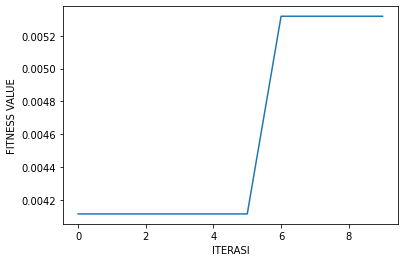

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(iterasi, fitness_value)
plt.ylabel('FITNESS VALUE')
plt.xlabel('ITERASI')
plt.show()

# **jaga2**

In [ ]:
hasil = populasi_init()
hasil

[['G0004',
  'G0006',
  'G0002',
  'G0005',
  'G0001',
  'G0003',
  335,
  0.0029850746268656717,
  23.184872254658533],
 ['G0001',
  'G0006',
  'G0002',
  'G0005',
  'G0003',
  'G0004',
  325,
  0.003076923076923077,
  23.898252939417258],
 ['G0005',
  'G0006',
  'G0003',
  'G0002',
  'G0001',
  'G0004',
  265,
  0.0037735849056603774,
  29.30917813324758],
 ['G0001',
  'G0004',
  'G0002',
  'G0006',
  'G0005',
  'G0003',
  329,
  0.00303951367781155,
  23.607696672676624]]

In [ ]:
hasil = Sort(hasil)
hasil

[['G0004',
  'G0006',
  'G0002',
  'G0005',
  'G0001',
  'G0003',
  335,
  0.0029850746268656717,
  23.184872254658533],
 ['G0001',
  'G0004',
  'G0002',
  'G0006',
  'G0005',
  'G0003',
  329,
  0.00303951367781155,
  23.607696672676624],
 ['G0001',
  'G0006',
  'G0002',
  'G0005',
  'G0003',
  'G0004',
  325,
  0.003076923076923077,
  23.898252939417258],
 ['G0005',
  'G0006',
  'G0003',
  'G0002',
  'G0001',
  'G0004',
  265,
  0.0037735849056603774,
  29.30917813324758]]

In [ ]:
seleksi = selection_2parents(hasil)
seleksi

[-1, 19, 45, 72, 100]


[['G0002',
  'G0001',
  'G0004',
  'G0003',
  'G0005',
  'G0006',
  309,
  0.003236245954692557,
  27.794518271366425],
 ['G0003',
  'G0001',
  'G0002',
  'G0005',
  'G0004',
  'G0006',
  441,
  0.0022675736961451248,
  19.47507062551525]]

In [ ]:
crossoper = crossover(seleksi)
crossoper

In [ ]:
mutasi = mutation(hasil)
mutasi

In [ ]:
for i in range(4):
  del hasil[i][6:]

In [ ]:
[del hasil[i][6:] for hasil in hasil]

In [ ]:
hasil

In [ ]:
hasil[-2]

In [ ]:
mutasi[0]

In [ ]:
yoi = []
for i in range(2):
  yoi.append({i:'halah'})
yoi

In [ ]:
middle = int((len(picked_chrom[0])-3)/2)
point = 0
spx = []
for i in range(2):
  point = 0
  mark = True
  while(mark):
    if(point<middle):
      if(picked_chrom[i][point] not in spx):
        spx.append(picked_chrom[i][point])
      point = point+1
      if(i == len(range(2))-1 and point==middle):
        mark = False
    else:
      if(picked_chrom[i+1][point] not in spx):
        spx.append(picked_chrom[i+1][point])
      point = point+1
      if(point==6):
        mark = False
spx

In [ ]:
nama

In [ ]:
hidih in nama

In [ ]:
nama = []
namaa = ['yoi', 'Apa', 'yes', 'ok', 'ha']
haa = ['hei', 'knp', 'ok', 'yes', 'ha']
hidih = ['hei', 'ok', 'knp', 'yes', 'ha']
nama.append(namaa)
nama.append(haa)